This notebook explains how we can go about explore and prepare data for model building.The notebook is structured in the following way 

 - About Dataset
 - Data Summary
 - Feature Engineering
 - Missing Value Analysis
 - Outlier Analysis
 - Correlation Analysis
 - Visualizing Distribution Of Data
 - Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)
 - Filling 0's In Windspeed Using Random Forest
 - Linear Regression Model
 - Regularization Models
 - Ensemble Models
 
 
 이 노트북은 모델 구축에 필요한 데이터를 탐색하고 준비하는 방법을 설명합니다.노트북의 구조는 다음과 같습니다.

- 데이터 세트 정보
- 데이터 요약
- 피쳐 엔지니어링
- 결측값 분석
- 특이치 분석
- 상관 관계 분석
- 데이터 분포 시각화
- 개수 VS 시각화(월, 계절,시, 요일, 사용자 유형)
- 랜덤 포레스트를 사용하여 풍속 0 채우기
- 선형 회귀 모형
- 정규화 모델
- 앙상블 모델

## About Dataset

#### **Overview**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

개요
자전거 공유 시스템은 시내 곳곳에 있는 키오스크 위치망을 통해 회원가입, 대여, 자전거 반납 절차가 자동화되는 자전거 대여 수단이다. 이 시스템을 이용하면 사람들은 한 장소에서 자전거를 빌려서 필요에 따라 다른 곳으로 반납할 수 있다. 현재 전 세계에는 500개가 넘는 자전거 공유 프로그램이 있다.


#### **Data Fields**

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable)




데이터 필드

* 날짜 시간 - 시간당 날짜 + 타임스탬프
* 시즌 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* 휴일 - 그날을 공휴일로 간주하는지 여부
* 근무일 - 그날이 주말이 아니든 휴일이든 상관없이
* 날씨 -
  * 1: 맑음, 구름이 적음, 부분적으로 흐림, 부분적으로 흐림
  * 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름 몇 개, 안개 몇 개
  * 3: 가벼운 눈, 가벼운 비 + 천둥번개 + 흩날리는 구름, 가벼운 비 + 흩날리는 구름
  * 4: 폭우 + 얼음 팔레트 + 천둥번개 + 안개, 눈 + 안개
* 온도 - 온도(섭씨)
* 온도 - 섭씨 "느낌" 온도
* 습도 - 상대 습도
* 풍속 - 풍속
* 캐주얼 - 등록되지 않은 사용자 렌탈 시작 수
* 등록됨 - 등록된 사용자 임대 시작 수
* 카운트 - 총 렌트 수(종속 변수)

In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

#### **Lets Read In The Dataset**

In [2]:
#!ls -alh /kaggle/input
dailyData = pd.read_csv("/kaggle/input/train.csv")

## Data Summary ( 1. 데이터 요약 )

As a first step lets do three simple steps on the dataset

 - Size of the dataset
 - Get a glimpse of data by printing few rows of it.
 - What type of variables contribute our data
 
 
데이터 요약.
첫 번째 단계로 데이터셋에 대해 세 가지 간단한 단계를 수행합니다.

* 데이터 집합 크기
* 데이터 행을 몇 개 인쇄하여 데이터를 한눈에 볼 수 있습니다.
* 데이터를 제공하는 변수 유형

#### **Shape Of The Dataset**

데이터 집합 크기

In [3]:
dailyData.shape

(10886, 12)

#### **Sample Of First Few Rows**
샘플데이터 확인

In [4]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


#### **Variables Data Type**
컬럼유형 확인

In [5]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

 - Create new columns "date,"hour","weekDay","month" from "datetime"
   column.
 - Coerce the datatype of "season","holiday","workingday" and weather to category.
 - Drop the datetime column as we already extracted useful features from it.
 
 
 위의 결과에서 알 수 있듯이, "계절", "휴일", "근무일" 및 "날씨" 열은 "범주적" 데이터 유형이어야 합니다.
 그러나 현재 데이터 유형은 해당 열의 "int"입니다. 데이터셋을 다음과 같은 방법으로 변환하여 EDA를 시작할 수 있도록 지원합니다.

* "datetime" 열에서 "date", "hour", "weekDay", "month" 열을 만듭니다.
* "계절", "휴일", "근무일" 및 날씨의 데이터 유형을 카테고리로 강제 지정합니다.
* 날짜 시간 열에서 유용한 기능을 이미 추출했으므로 해당 열을 삭제하십시오.

#### **Creating New Columns From "Datetime" Column** 

Datetime 신규 컬럼 생성

In [6]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

#### **Coercing To Category Type**

범주 유형으로 강제 적용

In [7]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

#### **Dropping Unncessary Columns**

불필요한 열 삭제

In [8]:
dailyData  = dailyData.drop(["datetime"],axis=1)

#### **Lets Start With Very Simple Visualization Of Variables DataType Count**

변수 데이터 유형 수를 매우 간단하게 시각화하는 것부터 시작

<AxesSubplot:xlabel='variableType', ylabel='count'>

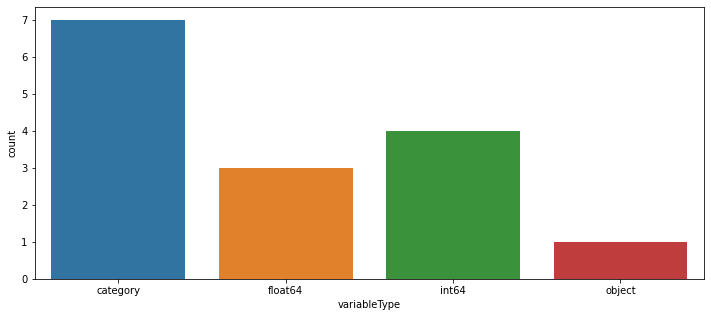

In [9]:
typeCountSerie = dailyData.dtypes.value_counts()
typeNamesColumn = list(map(lambda t: t.name, typeCountSerie.index.values))
typeCountColumn = typeCountSerie.values

initialDataTypeOf = pd.DataFrame({
    "variableType" : typeNamesColumn,
    "count" : typeCountColumn
})

groupedDataTypeOf = initialDataTypeOf.groupby(['variableType']).sum()[['count']].reset_index()

fig,ax=plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=groupedDataTypeOf, x="variableType",y="count", ax=ax)

# 기존 오류 소스
# dataTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
# # fig,ax = plt.subplots()
# # fig.set_size_inches(12,5)

# sn.barplot(data=dailyData,x="variableType",y="count",ax=ax)
# ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

## Missing Values Analysis

결측치 분석

Once we get hang of the data and columns, next step we geneally is to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. One way which I generally prefer to visualize missing value in the dataset is through "missingno".

Its a quiet handy library to quickly visualize variables for missing values. As I mentioned earlier we got lucky this time as there no missing value in the dataset.

데이터와 열을 파악한 후 다음 단계는 일반적으로 데이터에 결측값이 있는지 여부를 확인하는 것입니다. 다행히 데이터 세트에 결측값이 없습니다. 일반적으로 데이터 집합의 결측값을 시각화하는 방법 중 하나는 "결측값"을 사용하는 것입니다.

결측값에 대한 변수를 빠르게 시각화할 수 있는 편리한 라이브러리입니다. 앞서 언급했듯이 이번에는 데이터셋에 결측값이 없어서 운이 좋았습니다.

## Skewness In Distribution ##

분포 내 왜도

<AxesSubplot:>

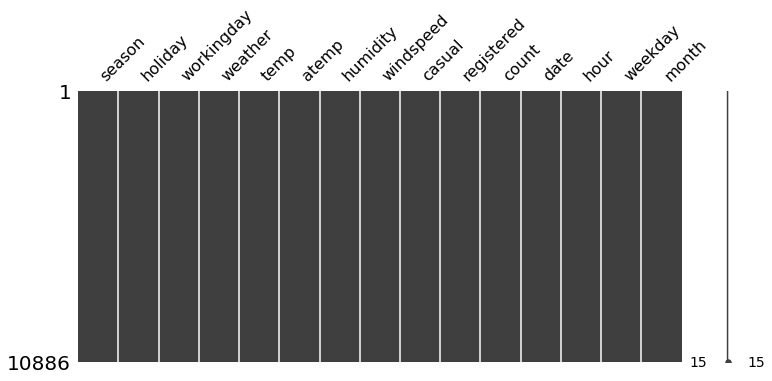

In [10]:
msno.matrix(dailyData,figsize=(12,5))

## Outliers Analysis

특이치 분석



At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

 - Spring season has got relatively lower count.The dip in median value
   in boxplot gives evidence for it.
 - The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time. 
 - Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.
 
 
 처음에 "카운트" 변수에는 분포를 오른쪽으로 왜곡하는 특이치 데이터 점이 많이 포함되어 있습니다(외부 사분위수 한계를 벗어나는 데이터 점이 더 많음).그러나 그 외에도 아래에 제시된 간단한 상자 그림에서 다음과 같은 추론을 할 수 있습니다.

* 봄철은 상대적으로 횟수가 적어졌다. 상자 그림의 중위수 값 딥은 이에 대한 증거를 제공합니다.

* "Hour Of The Day"라는 박스 플롯은 꽤 흥미롭습니다.중위수 값은 7AM - 8AM 및 5PM - 6PM에서 상대적으로 높습니다. 당시 일반 학교와 직장인 이용자들 덕분이라고 볼 수 있다.

* 대부분의 특이 사항은 "근무일"이 "비근무일"보다 "근무일"에서 주로 기여됩니다. 그것은 그림 4에서 잘 보입니다.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

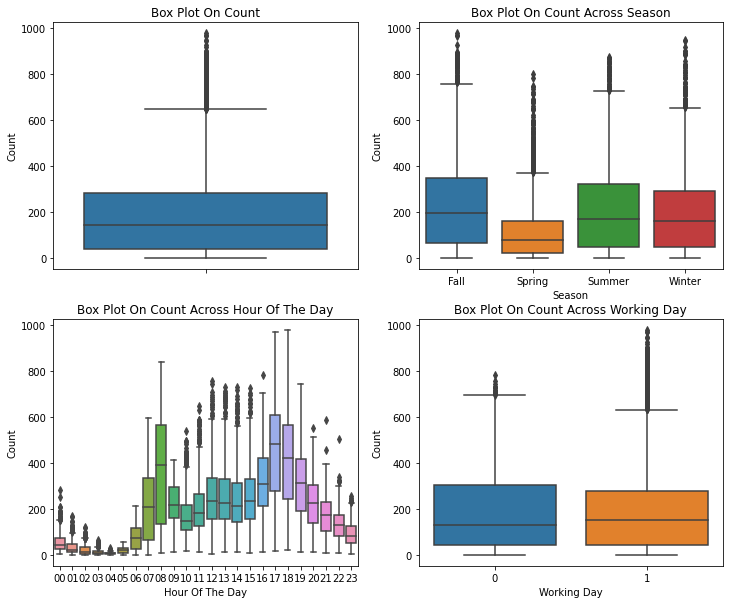

In [11]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

#### **Lets Remove Outliers In The Count Column**

카운트 열에서 특이치 제거

In [34]:
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"]-dailyData["count"].mean())<=(3*dailyData["count"].std())] 

In [35]:
print ("Shape Of The Before Ouliers: ",dailyData.shape)
print ("Shape Of The After Ouliers: ", dailyDataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


## Correlation Analysis

상관 분석

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

 - temp and humidity features has got positive and negative correlation
   with count respectively.Although the correlation between them are not
   very prominent still the count variable has got little dependency on
   "temp" and "humidity".
 - windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
 - "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
 - "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

종속 변수가 피쳐(숫자)의 영향을 받는 방식을 이해하는 일반적인 방법 중 하나는 변수 간의 상관 행렬을 피브하는 것입니다. "카운트"와 "온도", "atemp", "습도", "풍속" 사이의 상관 관계 그림을 그려보겠습니다.

온도 및 습도 특성은 각각 카운트와 양수 및 음수 상관관계를 갖습니다.이들 간의 상관 관계는 그다지 두드러지지는 않지만 카운트 변수는 "온도"와 "습도"에 거의 의존하지 않습니다.
풍속은 실제로 유용한 수치적 특성이 아닐 것이며 "count"와의 상관 관계 값에서 볼 수 있습니다.
"atemp"와 "temp"가 서로 강한 상관관계를 가지고 있기 때문에 "atemp"는 변수화되지 않습니다. 모델 작성 중에 변수 중 하나는 데이터에 다중 공선성을 나타내므로 삭제해야 합니다.
"Casual"과 "Registered"도 본질적으로 누출 변수이며 모델 구축 중에 떨어뜨려야 하기 때문에 고려되지 않습니다.
해저의 회귀도는 두 피쳐 간의 관계를 묘사하는 유용한 방법 중 하나입니다. 여기서는 "카운트" 대 "온도", "습도", "풍속"을 고려합니다.

<AxesSubplot:>

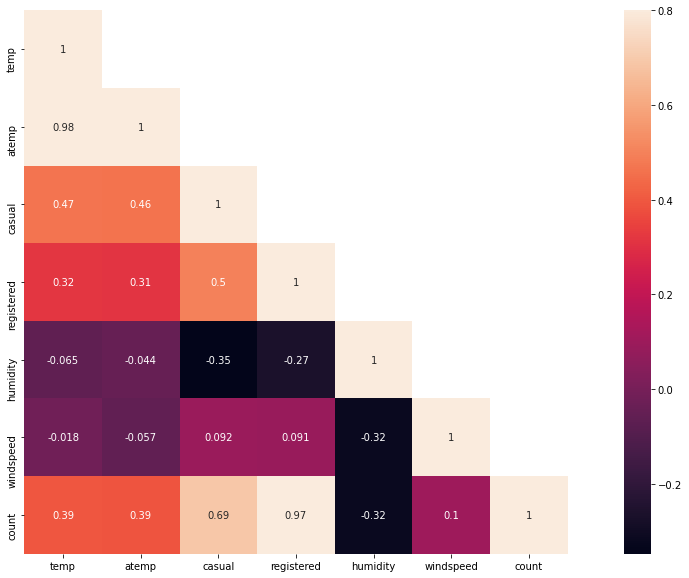

In [14]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

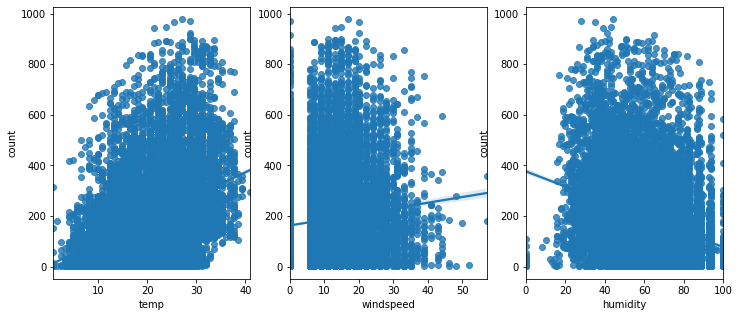

In [36]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp",      y="count", data=dailyData,ax=ax1)
sn.regplot(x="windspeed", y="count", data=dailyData,ax=ax2)
sn.regplot(x="humidity",  y="count", data=dailyData,ax=ax3)

## Visualizing Distribution Of Data

데이터 분포 시각화

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

아래 그림에서 볼 수 있듯이 "카운트" 변수는 오른쪽으로 치우쳐 있습니다. 대부분의 기계 학습 기법에서는 종속 변수가 정규 분포를 따라야 하므로 정규 분포를 따르는 것이 좋습니다. 한 가지 가능한 해결책은 특이치 데이터 점을 제거한 후 "카운트" 변수에 대한 로그 변환을 수행하는 것입니다. 변환 후 데이터는 훨씬 좋아 보이지만 여전히 이상적으로는 정규 분포를 따르지 않습니다.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

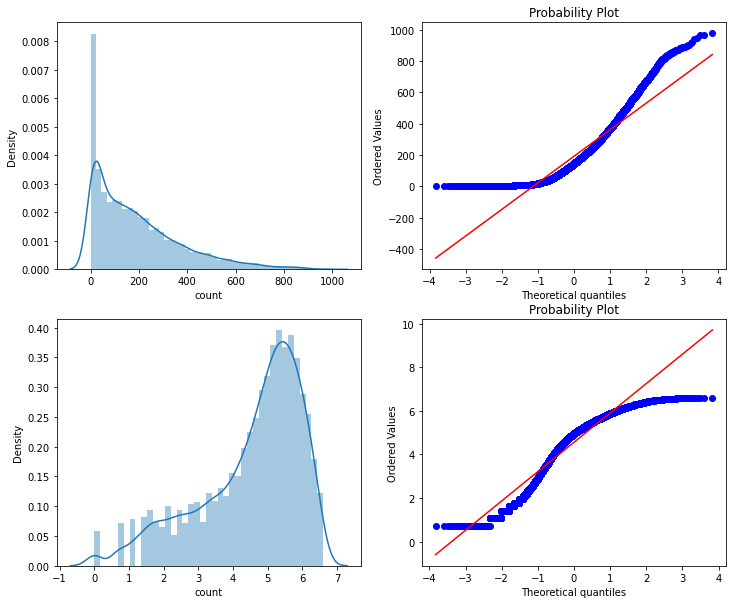

In [16]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(dailyData["count"],ax=axes[0][0])
stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

## Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

시각화 개수 vs (월, 계절, 시, 요일, 사용자 유형)

 - It is quiet obvious that people tend to rent bike during summer
   season since it is really conducive to ride bike at that
   season.Therefore June, July and August has got relatively higher
   demand for bicycle.
 - On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
 - Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
 - The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.
 
*  여름철에는 자전거를 타는 것이 매우 좋기 때문에 사람들이 자전거를 빌리는 경향이 있는 것은 꽤 명백하다.따라서 6월, 7월, 8월은 자전거에 대한 수요가 상대적으로 더 많아졌다.

* 평일에는 오전 7 ~ 8시, 오후 5 ~ 6시 경에 자전거를 대여하는 사람이 많아진다. 앞에서 언급했듯이 이것은 정규 학교 및 사무실 통근자들에게 기인할 수 있습니다.

* 위의 패턴은 "토요일" 및 "일요일"에는 관찰되지 않습니다.오전 10시에서 오후 4시 사이에 자전거를 대여하는 사람들이 많아졌다.

* 약 7AM-8AM 및 5PM-6PM의 최대 사용자 수는 등록된 사용자가 순수하게 기여합니다.

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

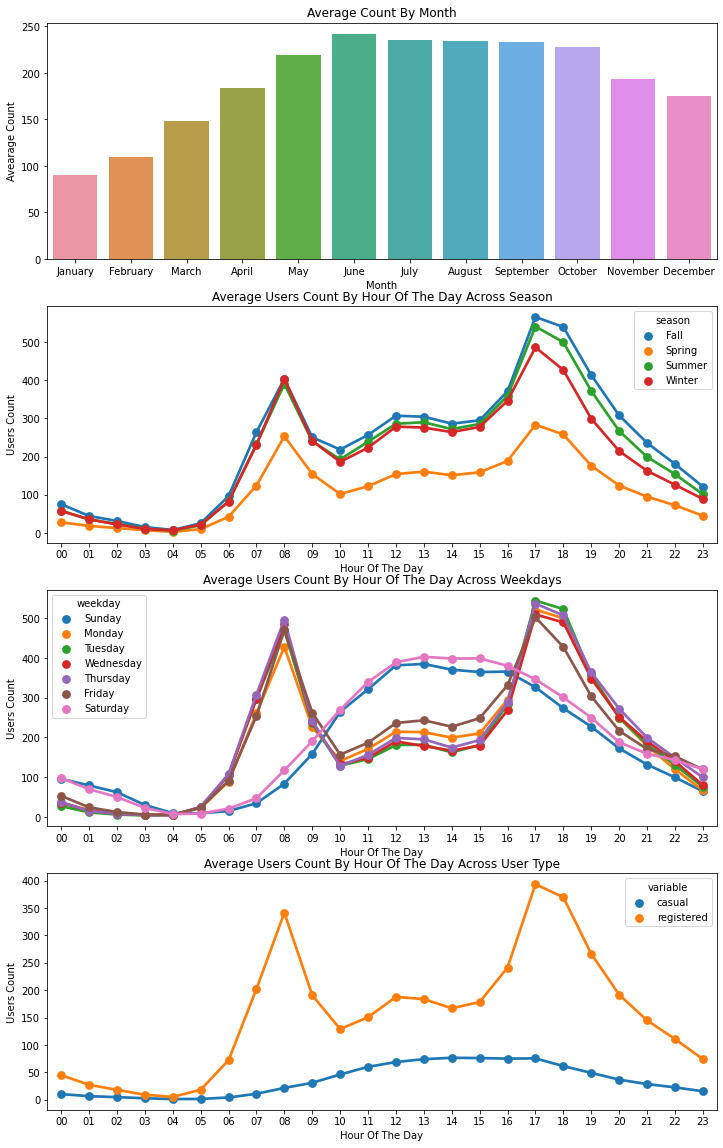

In [37]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dailyData[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

**So we have visualized the data to a greater extent.So lets go and  build some models and see how close we can predict the results.**

우리는 데이터를 더 많이 시각화했습니다.이제 몇 가지 모델을 구축하여 결과를 얼마나 근접하게 예측할 수 있는지 살펴보겠습니다.

## Filling 0's In windspeed Using Random Forest ##

랜덤 포레스트를 사용하여 풍속 0 채우기

**Lets Read In Train And Test Data**

트레이닝 데이터와 테스트 데이터 읽기

In [38]:
dataTrain = pd.read_csv("../input/train.csv")
dataTest = pd.read_csv("../input/test.csv")

**Combine Train And Test**

테스트 와 훈련 데이터 결합

In [40]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

**Feature Engineering**

피처 엔지니어링

In [41]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

**Random Forest Model To Predict 0's In Windspeed**

랜덤포레스트 모델로 풍속을 0으로 예측

In [42]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

**Coercing To Categorical Type**

카테고리 타입으로 타입 변경

In [43]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [44]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

**Splitting Train And Test Data**

훈련 데이터와 테스트데이터로 나눔

In [45]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

**Dropping  Unncessary Variables**

불필요한 변수 삭제

In [46]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

**RMSLE Scorer**

RMSLE 지표로 성능평가

In [47]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## **Linear Regression Model** ##

선형회귀 모델

**참조 : [https://programmers.co.kr/learn/courses/21/lessons/945](https://programmers.co.kr/learn/courses/21/lessons/945)

**참조 : [https://lheon.tistory.com/70](https://lheon.tistory.com/70)

**선형회귀 모델 Linear Regression Model**
* 선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
* 선형회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균 제곱 오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
* 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.
* 아래 위키피디아에서 가져온 그래프에서 파란 선이 선형회귀 모델을 나타내고 빨간 점들이 훈련데이터를 나타낸다.

![](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

#### 선형회귀의 모델 : 선형회귀(LinearRegression), 릿지(Ridge), 라쏘(Lasso) 모델


In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model ( 선형 회귀 모델을 초기화 )
lModel = LinearRegression()

# Train the model ( 모델을 학습시킨다. )
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions ( 정확도 평가 )
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.97796529425051


**릿지 Regularization Model - Ridge**
* 회귀를 위한 선형모델
* 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만드는 모델)
* Regularization(정칙화, 규제)은 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
* max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.
  L2 Regularization 

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779652791770218


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

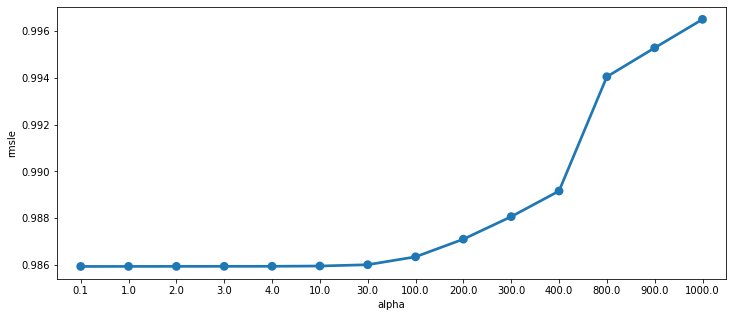

In [49]:
ridge_m_ = Ridge()

# 알파 값들을 바탕으로 gridsearch를 통해서 최적의 알파값을 찾음
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

# 1을 더한에 로그를 씌움
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)

#df = pd.DataFrame(grid_ridge_m.grid_scores_)  # 1번째 오류 발생
df = pd.DataFrame(grid_ridge_m.cv_results_)

#df["alpha"] = df["parameters"].apply(lambda x:x["alpha"]) # 2번째 오류 발생
df["alpha"] = df["params"].apply(lambda x:x["alpha"])

#df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x) # 3번째 오류 발생
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)


# 최적의 알파값은 0.1, RSRME 값은 0.9

## **Regularization Model - Lasso** ##

**라쏘 Regularization Model - Lasso**
* 선형회귀의 Regularization(규제)을 적용하는 대안
* 계수를 0에 가깝게 만들려고 하며 이를 L1 규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
* 피처 선택이 자동으로 이루어진다고도 볼 수 있다.
* alpha 값의 기본값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
* 그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파 값은 0.0025
* max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781008437915617


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

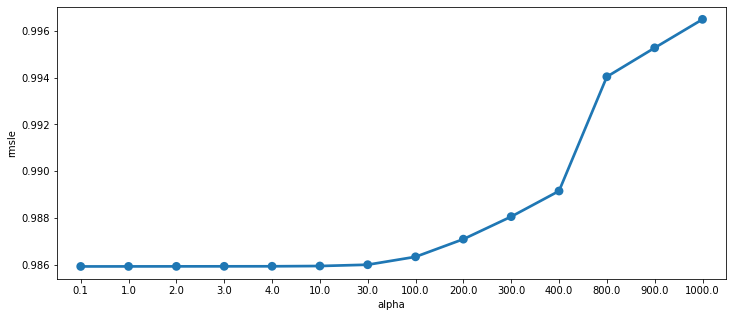

In [29]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)

#df = pd.DataFrame(grid_lasso_m.grid_scores_) # AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'
df = pd.DataFrame(grid_ridge_m.cv_results_)

#df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
#df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

##**Ensemble Models - Random Forest**##

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)

#print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

score=rmsle(np.exp(yLabelsLog),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.10288618060423946


## **Ensemble Model - Gradient Boost** ##

**Ensemble Model - Gradient Boost**
* 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
* 회귀와 분류에 모두 사용할 수 있음
* 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
* 무작위성이 없고 강력한 사전 가지치기가 사용됨
* 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름

* learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
* n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아지지만, 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수 있다.
* maxdepth(maxleaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
#print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

score=rmsle(np.exp(yLabelsLog),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ",score)

RMSLE Value For Gradient Boost:  0.18903566354498308


**Lets compare the distribution of train and test results. More or less the distribution of train and test looks identical. It  confirms visually that our model has not predicted really bad and not suffering from major overfitting problem.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

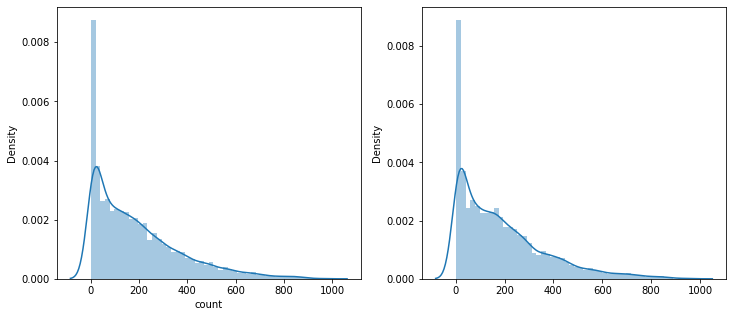

In [32]:
# train데이터의 count 값과 test 데이터의 count

#predsTest = rfModel.predict(X= dataTest) 
predsTest = gbm.predict(X= dataTest) 

#preds = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(preds),ax=ax2,bins=50)

In [33]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe2.csv', index=False)

**The submission will have test score of 0.41**

![](http://)